In [289]:
import numpy as np 
import pandas as pd 

Exploring dataset

In [290]:
df = pd.read_csv("Groceries_dataset.csv")

df.shape

(38765, 3)

In [291]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [292]:
customer_purchases = df[df['Member_number'] == 2552]['itemDescription'].tolist()
customer_purchases

['whole milk',
 'butter',
 'female sanitary products',
 'pot plants',
 'other vegetables',
 'tropical fruit',
 'root vegetables',
 'whole milk',
 'shopping bags',
 'chocolate',
 'chocolate',
 'coffee',
 'hygiene articles']

Identifying and removing duplicates

In [293]:
#Check for Duplicates
df.duplicated().sum()

np.int64(759)

In [294]:
#Remove Duplicates
df_cleaned = df.drop_duplicates()

print(f"Number of rows after deduplication: {df_cleaned.shape[0]}")

Number of rows after deduplication: 38006


In [295]:
df_cleaned.duplicated().sum()

np.int64(0)

Handling Missing Values

In [296]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Member_number      0
Date               0
itemDescription    0
dtype: int64


Preprocess data (convert transaction lists into a matrix format). 

In [297]:
# تحويل التاريخ من صيغة النص
df_cleaned.loc[:,'Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')
print(df_cleaned.dtypes)

Member_number       int64
Date               object
itemDescription    object
dtype: object


In [298]:

# تحويل البيانات إلى شكل قائمة معاملات (Transaction List)
transactions = df_cleaned.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()    #يتم تجميع المنتجات التي اشتراها كل عميل في قائمة معاملات.

transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['dish cleaner', 'cling film/bags'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene articles'],
 

Encoding the dataset


In [299]:
# تحويل قائمة المعاملات إلى DataFrame ثنائي القيم (One-Hot Encoding)
from mlxtend.preprocessing import TransactionEncoder

# initializing the transactionEncoder
te = TransactionEncoder() 
te_ary = te.fit(transactions).transform(transactions)  # تحويل البيانات إلى مصفوفة ثنائية
# يتم تحويل قائمة المعاملات إلى مصفوفة حيث يكون لكل منتج عمود، والقيم تكون 1 إذا كان المنتج موجودًا في المعاملة و0 إذا لم يكن موجودًا.
transformed_df = pd.DataFrame(te_ary, columns=te.columns_)  # تحويل المصفوفة إلى DataFrame
transformed_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Using Apriori algorithm

In [300]:
# تطبيق خوارزمية Apriori لاكتشاف المجموعات المتكررة

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(transformed_df, min_support=0.005, use_colnames=True)  #يتم البحث عن المجموعات المتكررة للمنتجات باستخدام الحد الأدنى للدعم (min_support=0.01).
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)  # عرض بعض العناصر المتكررة المكتشفة

      support                      itemsets  length
0    0.021386                    (UHT-milk)       1
1    0.008087               (baking powder)       1
2    0.033950                        (beef)       1
3    0.021787                     (berries)       1
4    0.016574                   (beverages)       1
..        ...                           ...     ...
121  0.011629            (soda, whole milk)       2
122  0.005814                (yogurt, soda)       2
123  0.008220  (tropical fruit, whole milk)       2
124  0.005213      (yogurt, tropical fruit)       2
125  0.011161          (yogurt, whole milk)       2

[126 rows x 3 columns]


يُظهر الناتج أن الحليب هو العنصر الأكثر تكرارًا في مجموعة البيانات الخاصة بنا. يمكننا استكشاف العنصر المتكرر بشكل أكبر للحصول على ما بداخله. على سبيل المثال، يمكننا طباعة جميع العناصر بطول 2، ويكون الحد الأدنى للدعم أكبر من 0.05.

In [301]:
# printing the frequntly items 
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
98,0.010559,"(rolls/buns, other vegetables)",2
103,0.014837,"(other vegetables, whole milk)",2
112,0.013968,"(rolls/buns, whole milk)",2
121,0.011629,"(soda, whole milk)",2
125,0.011161,"(yogurt, whole milk)",2


يوضح الناتج أن الكعك والخضراوات هي العناصر الأكثر حدوثًا عندما يكون طول مجموعة العناصر اثنين.

Mining association rules

In [302]:
#  اعتمدنا بمقياسنا على ال lift عشان نحدد علاقة العناصر واحتمالية شرائهم
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.5)   #استخراج القواعد الترابطية باستخدام مقياس Lift
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
# rules["antecedents"]: يحتوي على قائمة العناصر السابقة ، أي العناصر التي إذا اشتراها العميل فقد يكون من المحتمل أن يشتري العناصر الأخرى.
# rules["consequents"]: يحتوي على قائمة العناصر اللاحقة ، وهي العناصر التي يكون شراؤها متوقعًا بناءً على شراء العناصر السابقة.

rules.sort_values("lift",ascending=False)    #يرتب القواعد الترابطية بناءً على أعلى قيمة لـ lift، بحيث تكون أقوى العلاقات في الأعلى


#  Support (الدعم الكلي)
# يعني نسبة ظهور القاعدة بالكامل (antecedents → consequents) 

#  Antecedent Support 
# هو نسبة ظهور antecedents فقط في البيانات

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_length,consequents_length
12,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,1.0,0.000536,1.016420,0.108146,0.033261,0.016154,0.089214,1,1
13,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,1.0,0.000536,1.004579,0.118536,0.033261,0.004558,0.089214,1,1
59,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,1.0,0.000565,1.010345,0.104587,0.040913,0.010239,0.081082,1,1
58,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,1.0,0.000565,1.007049,0.107508,0.040913,0.007000,0.081082,1,1
54,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,1.0,0.000088,1.000963,0.016341,0.039259,0.000962,0.079906,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,1.0,-0.002525,0.972342,-0.324769,0.032818,-0.028445,0.063790,1,1
52,(root vegetables),(whole milk),0.069572,0.157923,0.007552,0.108549,0.687357,1.0,-0.003435,0.944615,-0.328344,0.034336,-0.058633,0.078185,1,1
53,(whole milk),(root vegetables),0.157923,0.069572,0.007552,0.047821,0.687357,1.0,-0.003435,0.977157,-0.350712,0.034336,-0.023377,0.078185,1,1
21,(other vegetables),(root vegetables),0.122101,0.069572,0.005280,0.043240,0.621522,1.0,-0.003215,0.972479,-0.409559,0.028326,-0.028300,0.059564,1,1


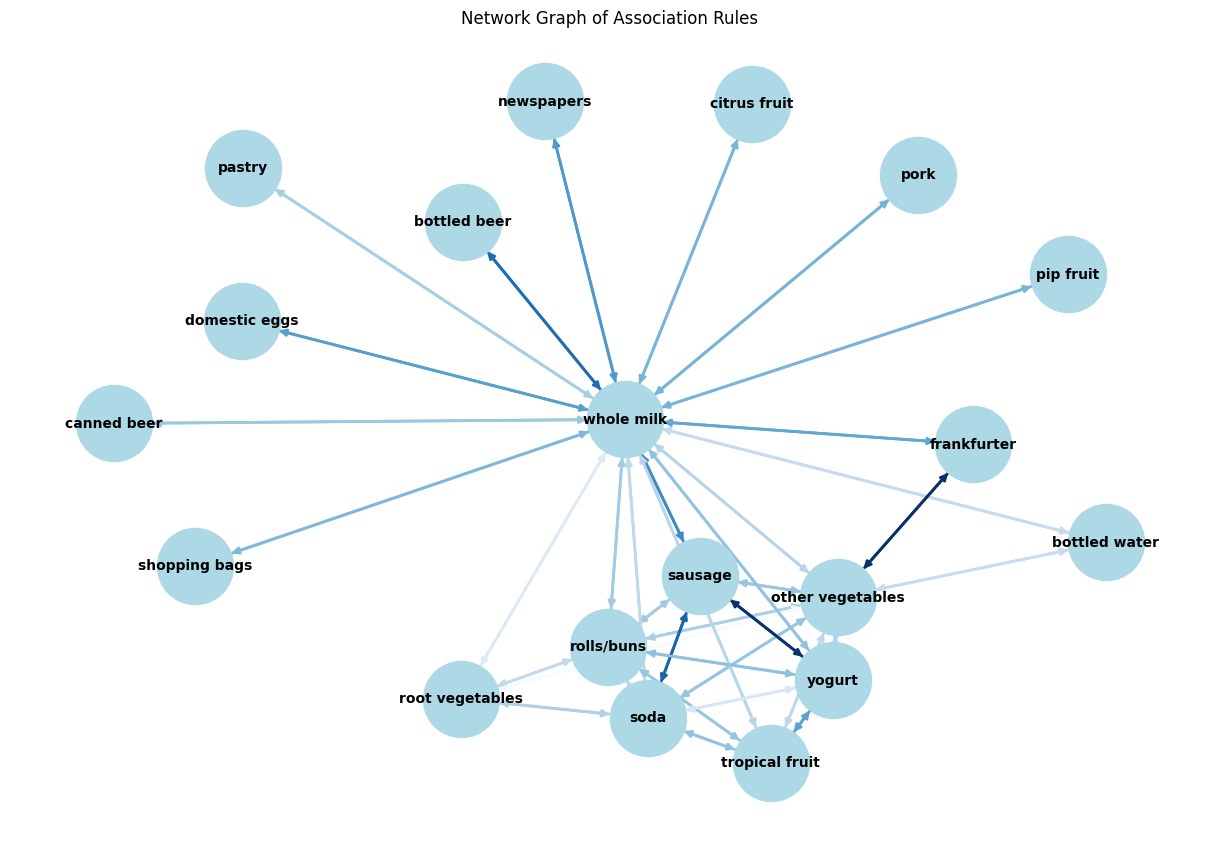

In [303]:
import networkx as nx
import matplotlib.pyplot as plt

# إنشاء الرسم البياني
G = nx.DiGraph()  # مخطط موجه

# إضافة الحواف (العلاقات) بين العناصر بناءً على القواعد المستخرجة
for _, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])  # المنتجات في الجانب الأول
    consequent = ', '.join(row['consequents'])  # المنتجات في الجانب الثاني
    lift = row['lift']  # قيمة الرفع (قوة العلاقة)

    G.add_edge(antecedent, consequent, weight=lift)

# تحديد مواضع العقد في الرسم
pos = nx.spring_layout(G, k=0.5)  # توزيع النقاط تلقائيًا

# رسم المخطط
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # أوزان الحواف تمثل قيمة lift

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue",
        font_size=10, font_weight="bold", edge_color=weights, edge_cmap=plt.cm.Blues,
        width=2, arrows=True)

plt.title("Network Graph of Association Rules")
plt.show()
